In [1]:
#installing the necessary libraries
!pip install mediapipe

In [33]:
#importing the necessary libraries
import mediapipe as mp
import numpy as np
import pandas as pd
import cv2
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic
import csv
# from google.colab.patches import cv2_imshow
import os
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image, display, clear_output, Video
from PIL import Image as PILImage
import io


In [34]:
os.listdir('.')

['.git',
 '.ipynb_checkpoints',
 'ali',
 'ali.zip',
 'creating model.docx',
 'first pose estimation module',
 'Multiclass ROC.png',
 'Pose Estimation and EDA Part 2.ipynb',
 'Pose Estimation and EDA.ipynb',
 'Pose Estimation Model Using Media Pipe to Determine Physical Activity.ipynb',
 'Pose Estimation Processing.ipynb',
 'poseproject.py',
 'Related Research Papers',
 'running(2).csv',
 'running.csv',
 'second pose estimation model',
 'second_model.pkl',
 'testignore.py',
 'third_model.pkl',
 'walking(2).csv',
 'walking.csv',
 'YOLO Pose Estimation',
 '__pycache__',
 '~$eating model.docx',
 '~$se Estimation as an Indicator of Human Health using Convolutional Neural Networks.docx',
 '~$Using Pose Estimation to Monitor Physical Activity.pptx',
 '~WRL1498.tmp',
 '~WRL1749.tmp',
 '~WRL2583.tmp']

## Read Collected Data and Process

In [35]:
# reading the different csv files containing pose values for walking and running videos
df= pd.read_csv('running.csv')
df1 = pd.read_csv('walking.csv')

In [36]:
df_comb = pd.concat([df1,df])

In [37]:
df_comb.shape

(17241, 2005)

In [38]:
df_comb.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,walking,0.739667,0.344423,-0.012661,0.999998,0.735189,0.335232,0.008083,0.999997,0.734425,...,0.003549,0,0.747232,0.338181,0.018280,0,0.747316,0.337497,0.019400,0
1,walking,0.739636,0.344414,-0.032703,0.999998,0.735183,0.335303,-0.013794,0.999997,0.734446,...,0.003040,0,0.745682,0.339299,0.016878,0,0.745749,0.338598,0.017953,0
2,walking,0.739575,0.345800,0.040964,0.999998,0.735128,0.336988,0.066227,0.999997,0.734438,...,0.006265,0,0.743964,0.342001,0.021203,0,0.743988,0.341338,0.022307,0
3,walking,0.739377,0.350469,-0.012318,0.999998,0.735127,0.340846,0.010717,0.999996,0.734441,...,0.003759,0,0.744457,0.342062,0.018220,0,0.744606,0.341393,0.019328,0
4,walking,0.740601,0.354311,-0.017117,0.999996,0.736014,0.344418,0.008009,0.999993,0.735214,...,0.003686,0,0.742289,0.343982,0.017894,0,0.742207,0.343290,0.019017,0


In [39]:
df_comb.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
6393,running,0.534882,0.221817,-0.330157,0.999384,0.526866,0.179126,-0.296100,0.999488,0.526015,...,0.007783,0,0.536841,0.171152,0.032036,0,0.537160,0.166591,0.033951,0
6394,running,0.536154,0.193326,-0.339168,0.999392,0.529028,0.148649,-0.305569,0.999507,0.528579,...,0.008429,0,0.540482,0.117124,0.037716,0,0.539951,0.113435,0.040072,0
6395,running,0.539830,0.145962,-0.344544,0.999396,0.529354,0.105857,-0.310312,0.999513,0.529937,...,0.007259,0,0.541797,0.092763,0.034308,0,0.541368,0.087676,0.036358,0
6396,running,0.545292,0.098444,-0.284175,0.999351,0.530619,0.060608,-0.250743,0.999499,0.530220,...,0.010458,0,0.553211,0.054901,0.038135,0,0.552735,0.050697,0.040427,0
6397,running,0.649487,0.630716,-0.125474,0.960592,0.632394,0.577264,-0.097073,0.961359,0.629375,...,0.000926,0,0.639048,0.612009,0.015434,0,0.640108,0.606726,0.016234,0


In [40]:
df_comb[df_comb['class']=='running']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,running,0.378387,0.319206,-0.210526,0.991188,0.382855,0.309241,-0.201222,0.992428,0.384623,...,-0.000598,0,0.386158,0.306356,0.001479,0,0.386883,0.305638,0.001528,0
1,running,0.375914,0.313265,-0.194547,0.992068,0.380006,0.304036,-0.184181,0.993184,0.382189,...,-0.000559,0,0.381673,0.299163,0.001658,0,0.382406,0.298431,0.001712,0
2,running,0.372104,0.303288,-0.196087,0.992861,0.376170,0.293164,-0.188253,0.993865,0.378630,...,-0.000373,0,0.378545,0.286693,0.001917,0,0.379299,0.285914,0.001987,0
3,running,0.369776,0.287826,-0.198347,0.993575,0.373667,0.279086,-0.191165,0.994477,0.376090,...,-0.000425,0,0.376341,0.273660,0.001874,0,0.377080,0.272926,0.001937,0
4,running,0.367219,0.277788,-0.225860,0.994217,0.371153,0.268409,-0.214665,0.995029,0.373580,...,-0.000471,0,0.374723,0.263586,0.002046,0,0.375460,0.262880,0.002119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,running,0.534882,0.221817,-0.330157,0.999384,0.526866,0.179126,-0.296100,0.999488,0.526015,...,0.007783,0,0.536841,0.171152,0.032036,0,0.537160,0.166591,0.033951,0
6394,running,0.536154,0.193326,-0.339168,0.999392,0.529028,0.148649,-0.305569,0.999507,0.528579,...,0.008429,0,0.540482,0.117124,0.037716,0,0.539951,0.113435,0.040072,0
6395,running,0.539830,0.145962,-0.344544,0.999396,0.529354,0.105857,-0.310312,0.999513,0.529937,...,0.007259,0,0.541797,0.092763,0.034308,0,0.541368,0.087676,0.036358,0
6396,running,0.545292,0.098444,-0.284175,0.999351,0.530619,0.060608,-0.250743,0.999499,0.530220,...,0.010458,0,0.553211,0.054901,0.038135,0,0.552735,0.050697,0.040427,0


In [41]:
df_comb[df_comb['class']=='walking']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,walking,0.739667,0.344423,-0.012661,0.999998,0.735189,0.335232,0.008083,0.999997,0.734425,...,0.003549,0,0.747232,0.338181,0.018280,0,0.747316,0.337497,0.019400,0
1,walking,0.739636,0.344414,-0.032703,0.999998,0.735183,0.335303,-0.013794,0.999997,0.734446,...,0.003040,0,0.745682,0.339299,0.016878,0,0.745749,0.338598,0.017953,0
2,walking,0.739575,0.345800,0.040964,0.999998,0.735128,0.336988,0.066227,0.999997,0.734438,...,0.006265,0,0.743964,0.342001,0.021203,0,0.743988,0.341338,0.022307,0
3,walking,0.739377,0.350469,-0.012318,0.999998,0.735127,0.340846,0.010717,0.999996,0.734441,...,0.003759,0,0.744457,0.342062,0.018220,0,0.744606,0.341393,0.019328,0
4,walking,0.740601,0.354311,-0.017117,0.999996,0.736014,0.344418,0.008009,0.999993,0.735214,...,0.003686,0,0.742289,0.343982,0.017894,0,0.742207,0.343290,0.019017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10838,walking,0.726715,0.507788,-0.408811,0.993616,0.726992,0.522578,-0.390809,0.993790,0.721008,...,-0.004033,0,0.715235,0.460034,-0.010914,0,0.716918,0.462585,-0.011722,0
10839,walking,0.521102,0.218048,0.088649,0.999912,0.517754,0.211410,0.062206,0.999888,0.515336,...,-0.003880,0,0.507093,0.199280,-0.002067,0,0.505251,0.199624,-0.002123,0
10840,walking,0.505590,0.202631,0.132157,0.999962,0.503652,0.192337,0.106413,0.999945,0.501878,...,-0.001099,0,0.491259,0.176000,0.004257,0,0.490307,0.177009,0.004576,0
10841,walking,0.504032,0.202473,0.151503,0.999966,0.501799,0.192237,0.128038,0.999952,0.499967,...,-0.001215,0,0.491965,0.177201,0.003314,0,0.490938,0.178318,0.003581,0


## Descriptive Statistics

In [42]:
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17241 entries, 0 to 6397
Columns: 2005 entries, class to v501
dtypes: float64(1536), int64(468), object(1)
memory usage: 263.9+ MB


In [43]:
df.describe()

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,...,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.0
mean,0.530356,0.329476,-0.336038,0.997800,0.537967,0.310504,-0.319536,0.997479,0.542954,0.310388,...,-0.002035,0.0,0.546653,0.307165,0.001636,0.0,0.548126,0.305313,0.001636,0.0
std,0.120432,0.122752,0.240227,0.012181,0.121400,0.124857,0.231950,0.013705,0.122208,0.124819,...,0.003767,0.0,0.123291,0.125543,0.009023,0.0,0.123554,0.125759,0.009565,0.0
min,0.001207,0.006418,-2.987498,0.718976,0.033465,-0.044037,-2.896114,0.679443,0.048974,-0.037096,...,-0.029534,0.0,0.061936,-0.027245,-0.026818,0.0,0.066565,-0.036764,-0.028332,0.0
25%,0.456979,0.248144,-0.446053,0.999412,0.464450,0.226550,-0.428232,0.999126,0.468372,0.226591,...,-0.003834,0.0,0.471753,0.223946,-0.002137,0.0,0.472908,0.221973,-0.002382,0.0
50%,0.516313,0.327637,-0.270803,0.999874,0.524792,0.307134,-0.254036,0.999790,0.529907,0.306908,...,-0.001250,0.0,0.534173,0.303377,0.001117,0.0,0.535140,0.301823,0.001138,0.0
75%,0.584894,0.412109,-0.181272,0.999961,0.595248,0.395632,-0.169605,0.999927,0.602185,0.396086,...,-0.000094,0.0,0.607689,0.394996,0.004987,0.0,0.609982,0.393343,0.005226,0.0
max,0.997647,0.877754,0.451539,0.999997,1.035309,0.873679,0.425880,0.999995,1.070572,0.872615,...,0.016850,0.0,1.076435,0.866775,0.064944,0.0,1.085279,0.865686,0.068516,0.0


In [44]:
#check for null values
df_comb.isnull().sum()

class    0
x1       0
y1       0
z1       0
v1       0
        ..
v500     0
x501     0
y501     0
z501     0
v501     0
Length: 2005, dtype: int64

In [45]:
# check for duplicated values
df_comb.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6393    False
6394    False
6395    False
6396    False
6397    False
Length: 17241, dtype: bool

## Feature Engineering and Feature Selection

In [46]:
X = df_comb.drop('class', axis=1) # selecting suitable x variables
y = df_comb['class'] #target values

In [47]:
y.head()

0    walking
1    walking
2    walking
3    walking
4    walking
Name: class, dtype: object

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12068, 2004), (5173, 2004), (12068,), (5173,))

## Principal Component Analysis (PCA)

1. Graph of Cumulative Variance versus Number of Components

In [50]:
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

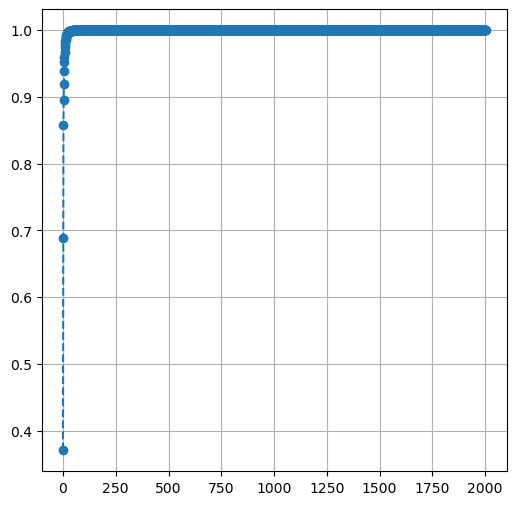

In [51]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_ # this attribute shows how much variance is explained by each of the seven individual component

# we can plot the cumulative value as below
plt.figure(figsize= (6, 6)) # size of the chart(size of the vectors)
cumulativeValue = pca.explained_variance_ratio_.cumsum() # get the cumulative sum
plt.grid()
plt.plot (cumulativeValue, marker = 'o', linestyle="--")

- The graph flattens at less than 50 features 

Perform PCA on Train Dataset

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

#using standard scaler
scaled_data = scaler.transform(X_train)

In [53]:
pca = PCA(n_components =50, svd_solver = 'auto', whiten= False, random_state=None)
pca.fit(scaled_data)

PCA(n_components=50)

In [54]:
X_train_pca = pca.transform(scaled_data)

In [55]:
X_train_pca.shape

(12068, 50)

Perform PCA on Test Dataset

In [56]:
# perform pca on test dataset
scaler.fit(X_test)
# using standard scaler
scaled_data = scaler.transform(X_test)

In [57]:
pca = PCA(n_components =50, svd_solver = 'auto', whiten= False, random_state=None)
pca.fit(scaled_data)
X_test_pca = pca.transform(scaled_data)

In [58]:
X_test_pca.shape

(5173, 50)

## Train Machine Learning Classification Models

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [60]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [61]:
#fit the different models
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model


In [62]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [63]:
fit_models['rc'].predict(X_test)

array(['running', 'walking', 'walking', ..., 'walking', 'walking',
       'running'], dtype='<U7')

## Evaluate and Serialize the Model

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import seaborn as sns


In [65]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print("The accuracy score of the different ML algorithms: ", algo, accuracy_score(y_test, yhat))
    print(algo, classification_report(y_test, yhat))


The accuracy score of the different ML algorithms:  lr 0.9021844190991688
lr               precision    recall  f1-score   support

     running       0.91      0.83      0.87      1987
     walking       0.90      0.95      0.92      3186

    accuracy                           0.90      5173
   macro avg       0.90      0.89      0.89      5173
weighted avg       0.90      0.90      0.90      5173

The accuracy score of the different ML algorithms:  rc 0.9398801469166828
rc               precision    recall  f1-score   support

     running       0.96      0.88      0.92      1987
     walking       0.93      0.98      0.95      3186

    accuracy                           0.94      5173
   macro avg       0.94      0.93      0.94      5173
weighted avg       0.94      0.94      0.94      5173

The accuracy score of the different ML algorithms:  rf 0.9945872801082544
rf               precision    recall  f1-score   support

     running       1.00      0.99      0.99      1987
     w

In [66]:
#getting the accuracy of the random forest model
y_pred_rf = fit_models['rf'].predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"The accuracy of the Random Forest model : {accuracy:.2f}")

The accuracy of the Random Forest model : 0.99


In [67]:
#getting the confusion matrix of the random Forest model
rf_conf_mat = confusion_matrix(y_test, y_pred_rf)
print(rf_conf_mat)

[[1964   23]
 [   5 3181]]


<Axes: >

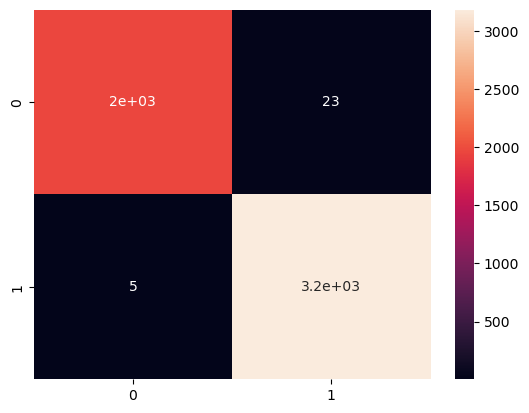

In [68]:
sns.heatmap(rf_conf_mat, annot=True)

### Creating and Saving the Model

In [69]:
#save the random forest model as a pickle file
with open('second_model.pkl','wb') as f:
    pickle.dump(fit_models['rf'],f)

- Save the random forest (RF) model as a pickle file

In [70]:
#load the pickle file
with open('second_model.pkl','rb') as f:
    model = pickle.load(f)

In [71]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

## Testing on Untrained Videos to Check on Model Performance

## Part A: Running Videos

In [72]:
#list of test videos
test_video1 = r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\run-test5.mp4'
test_video2 = r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\run-test2.mp4'
test_video3 = r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\run-test4.mp4'

In [73]:
#function to process video
def get_video_properties(video_path):
    #open the video file
    cap = cv2.VideoCapture(video_path)

    #check if the video file is opened successfully
    if not cap.isOpened():
        raise ValueError("Could not open video file")

    #Get video properties
    properties = {
        "fps": int(cap.get(cv2.CAP_PROP_FPS)),
        "frame_count": int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        "duration_seconds": int( cap.get(cv2.CAP_PROP_FRAME_COUNT) / cap.get(cv2.CAP_PROP_FPS) ),
        "width": int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        "height": int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
        "codec": int(cap.get(cv2.CAP_PROP_FOURCC)),
    }

    #release the video capture object
    cap.release()

    return properties

In [74]:
# function to process videos on the model
def process_video(video_file):
    width= 1400
    height=1400
    cap = cv2.VideoCapture(video_file)
    #initiate holistic model
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                print("Error no Image Found")
                break

            
            # Resize the frame to the desired dimensions
            frame = cv2.resize(frame, (width, height))
            #recolor Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

          #make Detections
            results = holistic.process(image)
          #print(results.face_landmarks)

          #recolor image back to BGR for rendering
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

          #draw face landmarks
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                  )

            #right hand
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                  )

            #left hand
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                  )

            # pose detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                  )
          # Export coordinates
            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

                # Extract Face landmarks
                face = results.face_landmarks.landmark
                face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

                # Concate rows
                row = pose_row+face_row


                # Make Detections
                X = pd.DataFrame([row])
                body_language_class = model.predict(X)[0]
                body_language_prob = model.predict_proba(X)[0]
                print(body_language_class, body_language_prob)

                # Grab shoulder coords
                coords = tuple(np.multiply(
                              np.array(
                                  (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].x,
                                  results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_SHOULDER].y))
                          , [640,480]).astype(int))

                cv2.rectangle(image,
                            (coords[0], coords[1]+5),
                            (coords[0]+len(body_language_class)*20, coords[1]-30),
                            (245, 117, 16), -1)
                cv2.putText(image, body_language_class, coords,
                          cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # Get status box
                cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)

                # Display Class
                cv2.putText(image, 'CLASS'
                          , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, body_language_class.split(' ')[0]
                          , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

                # Display Probability
                cv2.putText(image, 'PROB'
                          , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
                cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                          , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


            except:
                pass
            
            cv2.imshow('Feed', image)
            #if you want to break the loop, you can use a condition (like checking for a key press, as you did in your code)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    cap.release()
    cv2.destroyAllWindows()

### 1. First Video (Running Video)

In [75]:
video_properties = get_video_properties(test_video1)

In [76]:
process_video(test_video1)

running [0.74 0.26]
running [0.81 0.19]
running [0.8 0.2]
running [0.79 0.21]
running [0.78 0.22]
running [0.76 0.24]
running [0.79 0.21]
running [0.76 0.24]
running [0.75 0.25]
running [0.73 0.27]
running [0.8 0.2]
running [0.86 0.14]
running [0.87 0.13]
running [0.87 0.13]
running [0.92 0.08]
running [0.92 0.08]
running [0.9 0.1]
running [0.87 0.13]
running [0.88 0.12]
running [0.85 0.15]
running [0.83 0.17]
running [0.82 0.18]
running [0.82 0.18]
running [0.77 0.23]
running [0.72 0.28]
running [0.77 0.23]
running [0.81 0.19]
running [0.78 0.22]
running [0.82 0.18]
running [0.82 0.18]
running [0.8 0.2]
running [0.81 0.19]
running [0.79 0.21]
running [0.74 0.26]
running [0.73 0.27]
running [0.83 0.17]
running [0.81 0.19]
running [0.78 0.22]
running [0.77 0.23]
running [0.72 0.28]
running [0.74 0.26]
running [0.67 0.33]
running [0.54 0.46]
running [0.55 0.45]
walking [0.46 0.54]
walking [0.45 0.55]
walking [0.46 0.54]
walking [0.4 0.6]
running [0.52 0.48]
running [0.51 0.49]
running [0

### 2. Second Video (Running Video)

In [57]:
video_properties2 = get_video_properties(test_video2)

In [59]:
process_video(test_video2)

walking [0.47 0.53]


### 3. Third Video (Running Video)

In [60]:
video_properties3 = get_video_properties(test_video3)

In [62]:
process_video(test_video3)

walking [0.46 0.54]
walking [0.49 0.51]
walking [0.47 0.53]
walking [0.44 0.56]
walking [0.41 0.59]
walking [0.41 0.59]
walking [0.37 0.63]
walking [0.36 0.64]
walking [0.21 0.79]
walking [0.24 0.76]
walking [0.27 0.73]
walking [0.25 0.75]
walking [0.27 0.73]
walking [0.22 0.78]
walking [0.23 0.77]
walking [0.24 0.76]
walking [0.21 0.79]
walking [0.22 0.78]
walking [0.24 0.76]
walking [0.27 0.73]
walking [0.26 0.74]
walking [0.26 0.74]
walking [0.25 0.75]
walking [0.31 0.69]
walking [0.27 0.73]
walking [0.27 0.73]
walking [0.37 0.63]
walking [0.37 0.63]
walking [0.41 0.59]
walking [0.39 0.61]
walking [0.39 0.61]
walking [0.34 0.66]
walking [0.38 0.62]
walking [0.41 0.59]
walking [0.36 0.64]
walking [0.45 0.55]
running [0.5 0.5]
running [0.55 0.45]
running [0.54 0.46]
running [0.51 0.49]
running [0.51 0.49]
running [0.53 0.47]
running [0.6 0.4]
running [0.64 0.36]
running [0.56 0.44]
running [0.55 0.45]
running [0.52 0.48]
running [0.54 0.46]
running [0.56 0.44]
running [0.54 0.46]
runn

## Part B: Walking Videos

In [92]:
walk_video1=r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\walk-test4.mp4'
walk_video2=r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\walk-test5.mp4'
walk_video3=r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\walk-test3.mp4'
walk_video4=r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\walk-test6.mp4' 
walk_video5=r'C:\Users\stanl\OneDrive\Desktop\Pose Estimation\second pose estimation model\walk-test7.mp4'

### 1. First Video (Walking Video)

In [93]:
walk_properties = get_video_properties(walk_video1)

In [94]:
import subprocess
# Video(data=walk_video1, embed=True, height=int(walk_properties['height'] * 0.5), width=int(walk_properties['width'] * 0.5))

In [95]:
process_video(walk_video1)

### 2. Second Video (Walking Video)

In [84]:
walk_properties1 = get_video_properties(walk_video2)

In [87]:
process_video(walk_video2)

running [0.73 0.27]
running [0.71 0.29]
running [0.68 0.32]
running [0.72 0.28]
running [0.71 0.29]
running [0.68 0.32]
running [0.66 0.34]
running [0.67 0.33]
running [0.68 0.32]
running [0.69 0.31]
running [0.74 0.26]
running [0.72 0.28]
running [0.7 0.3]
running [0.7 0.3]
running [0.72 0.28]
running [0.72 0.28]
running [0.71 0.29]
running [0.7 0.3]
running [0.69 0.31]
running [0.71 0.29]
running [0.7 0.3]
running [0.71 0.29]
running [0.74 0.26]
running [0.74 0.26]
running [0.74 0.26]
running [0.77 0.23]
running [0.75 0.25]
running [0.72 0.28]
running [0.71 0.29]
running [0.69 0.31]
running [0.68 0.32]
running [0.69 0.31]
running [0.69 0.31]
running [0.77 0.23]
running [0.78 0.22]
running [0.78 0.22]
running [0.79 0.21]
running [0.85 0.15]
running [0.85 0.15]
running [0.84 0.16]
running [0.87 0.13]
running [0.89 0.11]
running [0.85 0.15]
running [0.84 0.16]
running [0.83 0.17]
running [0.79 0.21]
running [0.83 0.17]
running [0.84 0.16]
running [0.82 0.18]
running [0.82 0.18]
running 

### 3. Third Video (Walking Video)

In [77]:
walk_properties2 = get_video_properties(walk_video3)

In [89]:
import subprocess
# Video(data=walk_video3, embed=True, height=int(walk_properties2['height'] * 0.5), width=int(walk_properties2['width'] * 0.5))

In [88]:
process_video(walk_video3)

### 4. Fourth Video (Walking Video)

In [100]:
process_video(walk_video4)

walking [0.46 0.54]
walking [0.39 0.61]
walking [0.41 0.59]
walking [0.48 0.52]
walking [0.47 0.53]
walking [0.48 0.52]
running [0.51 0.49]
running [0.5 0.5]
walking [0.48 0.52]
running [0.51 0.49]
walking [0.46 0.54]
walking [0.43 0.57]
walking [0.44 0.56]
running [0.51 0.49]
running [0.5 0.5]
running [0.53 0.47]
running [0.55 0.45]
running [0.58 0.42]
running [0.57 0.43]
running [0.57 0.43]
running [0.58 0.42]
running [0.58 0.42]
running [0.58 0.42]
running [0.55 0.45]
running [0.56 0.44]
running [0.54 0.46]
running [0.51 0.49]
running [0.55 0.45]
running [0.56 0.44]
running [0.52 0.48]
running [0.56 0.44]
running [0.56 0.44]
running [0.56 0.44]
running [0.56 0.44]
running [0.59 0.41]
running [0.52 0.48]
running [0.58 0.42]
running [0.56 0.44]
running [0.55 0.45]
running [0.53 0.47]
running [0.55 0.45]
running [0.53 0.47]
running [0.53 0.47]
running [0.54 0.46]
running [0.55 0.45]
running [0.51 0.49]
running [0.52 0.48]
running [0.52 0.48]
running [0.52 0.48]
running [0.52 0.48]
runn

In [97]:
process_video(walk_video5)

running [0.53 0.47]
running [0.57 0.43]
running [0.58 0.42]
running [0.6 0.4]
running [0.6 0.4]
running [0.61 0.39]
running [0.56 0.44]
running [0.62 0.38]
running [0.62 0.38]
running [0.65 0.35]
running [0.63 0.37]
running [0.64 0.36]
running [0.63 0.37]
running [0.64 0.36]
running [0.63 0.37]
running [0.65 0.35]
running [0.58 0.42]
running [0.62 0.38]
running [0.62 0.38]
running [0.67 0.33]
running [0.52 0.48]
running [0.56 0.44]
running [0.6 0.4]
running [0.59 0.41]
running [0.55 0.45]
running [0.53 0.47]
running [0.5 0.5]
running [0.54 0.46]
running [0.56 0.44]
running [0.54 0.46]
running [0.54 0.46]
running [0.58 0.42]
running [0.51 0.49]
running [0.53 0.47]
running [0.56 0.44]
running [0.6 0.4]
running [0.51 0.49]
running [0.5 0.5]
running [0.56 0.44]
running [0.51 0.49]
running [0.52 0.48]
running [0.53 0.47]
running [0.54 0.46]
running [0.54 0.46]
running [0.53 0.47]
running [0.54 0.46]
running [0.52 0.48]
walking [0.47 0.53]
walking [0.48 0.52]
running [0.5 0.5]
running [0.53 